# Linear Algebra II: Matrix Operations

This topic, *Linear Algebra II: Matrix Operations*, builds on the basics of linear algebra. It is essential because these intermediate-level manipulations of tensors lie at the heart of most machine learning approaches and are especially predominant in deep learning. 

Through the measured exposition of theory paired with interactive examples, you’ll develop an understanding of how linear algebra is used to solve for unknown values in high-dimensional spaces as well as to reduce the dimensionality of complex spaces. The content covered in this topic is itself foundational for several other topics in the *Machine Learning Foundations* series, especially *Probability & Information Theory* and *Optimization*. 

## Segment 1: Review of Introductory Linear Algebra

In [2]:
import numpy as np

In [3]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [4]:
x.shape

(3,)

In [5]:
x = np.array([[25, 2, 5]])
x

array([[25,  2,  5]])

In [6]:
x.shape

(1, 3)

In [7]:
x.T

array([[25],
       [ 2],
       [ 5]])

In [8]:
x.T.shape

(3, 1)

## $L^2$ Norm

In [9]:
x

array([[25,  2,  5]])

In [10]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [11]:
np.linalg.norm(x)

25.573423705088842

### Matrices

In [12]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [13]:
X.shape

(3, 2)

### Matrix Transposition

In [14]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [15]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

### Matrix Multiplication

In [16]:
X*3

array([[75,  6],
       [15, 78],
       [ 9, 21]])

In [17]:
X*3+3

array([[78,  9],
       [18, 81],
       [12, 24]])

Using the multiplication operator on two tensors of the same size in Numpy or TensorFlow applies element-wise operations. This is the **Hadamard product** (denoted by the $\odot$ operator, e.g., $A \odot B$) *not* **matrix multiplication**: 

In [18]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [19]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [20]:
X * A

array([[ 75,   8],
       [ 25, 156],
       [ 21,  56]])

Matrix multiplication with a vector: 

In [21]:
b = np.array([1, 2])
b

array([1, 2])

In [22]:
np.dot(A, b)

array([11, 17, 23])

Matrix multiplication with two matrices:

In [23]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [24]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

### Matrix Inversion

In [25]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [26]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [27]:
y= np.array([4, -7])
y

array([ 4, -7])

In [28]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$: 

In [29]:
np.dot(X, w)

array([ 4., -7.])

## Segment 2: Eigendecomposition

### Affine Transformation via Matrix Application

Let's say we have a vector $v$:

In [30]:
v = np.array([3, 1])
v

array([3, 1])

Let's plot $v$ using my `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [40]:
import matplotlib.pyplot as plt

In [41]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

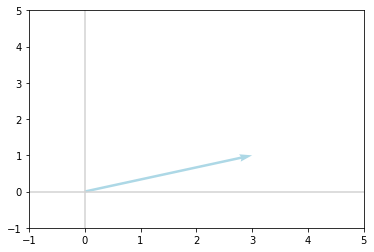

In [44]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector: 

In [46]:
I = np.array([[1, 0], [0,1]])
I

array([[1, 0],
       [0, 1]])

In [48]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [49]:
v == Iv

array([ True,  True])

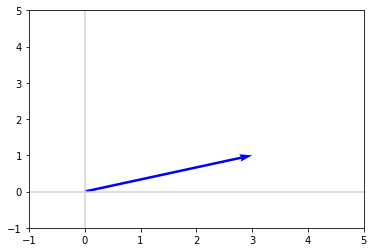

In [50]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1,5)

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis: 

In [51]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [52]:
Ev = np.dot(E,v)
Ev

array([ 3, -1])

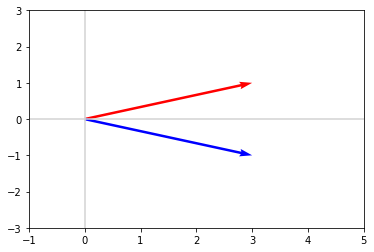

In [54]:
plot_vectors([v, Ev], ['red', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis: 

In [ ]:
F = np.array([[]])